In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
import random
import cmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# • Discrete Fourier Transform:

In [129]:
# Defining the function for computing the DFT:

def DFT(N,x_n):
    
    dft = []
    for k in range(N):
        x = 0
        for n in range(N):
                a = x_n[n]*complex(np.cos(((2*np.pi)/N)*k*n),-np.sin(((2*np.pi)/N)*k*n))
                x = x+a                     
        dft.append(x)
    return(dft)

# Defining the function for computing the IDFT:

def IDFT(N,x_n):
    
    idft = []
    for n in range(N):
        x = 0
        for k in range(N):
                a = x_n[k]*complex(np.cos(((2*np.pi)/N)*n*k),np.sin(((2*np.pi)/N)*k*n))
                x = x+a                     
        idft.append(x/N)
    return(idft)

# Defining the function for rotation of array:

def rotate(arr,d):
        n = len(arr)
        arr[:]=arr[d:n]+arr[0:d]
        return(arr)

In [130]:
# Function for finding circular convolution:


def cir(x1_n,x2_n):
    y = []
    x2_n = x2_n[::-1]
    for j in range(len(x1_n)):
        x = 0
        s = rotate(x2_n,-1)
        for i in range(len(x1_n)):
            x = x + (x1_n[i]*s[i])
        y.append(x)
    return(y)

In [131]:
# Finding the circular convolution of given sequence:

x = [1,2,3,0,0,0,0] 
h = [1,1,1,1,1,1,1]

circular = cir(x,h)
print("The circular convolution of given sequence is:\n\n",circular)

The circular convolution of given sequence is:

 [6, 6, 6, 6, 6, 6, 6]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


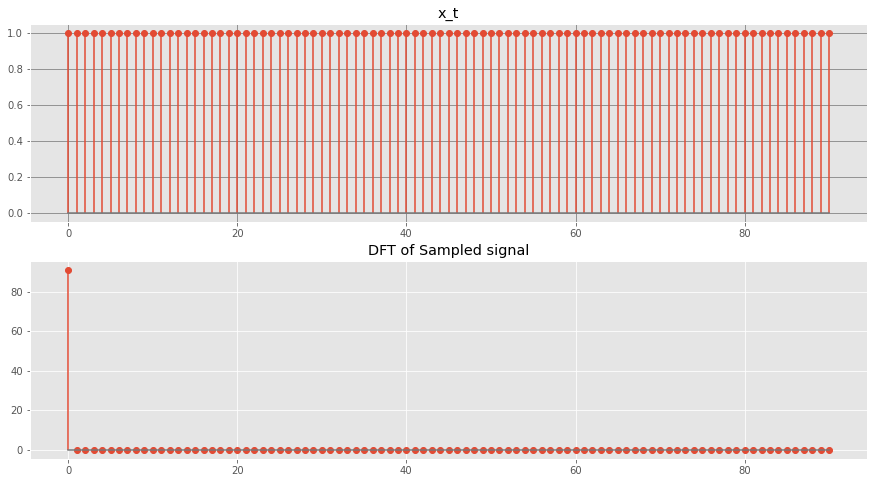

In [132]:
"""
A signal is given as x(t) = cos2πft where f = 30 Hz. The signal is sampled
at 100 times per second for 0.91 seconds and then its DFT is computed
"""

# defining the given sequence:

t = np.arange(0,91,1)
x_t = []
for i in (t):
    x1_t = np.cos(2*np.pi*30*i)
    x_t.append(x1_t)
    
# Computing the DFT of above sequence:

X_k = DFT(91,x_t) 

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.stem(x_t,use_line_collection=True)
style.use("ggplot")
plt.grid(color="gray")
plt.title("x_t")

plt.subplot(2,1,2)
plt.stem(X_k,use_line_collection=True)
plt.title("DFT of Sampled signal")

plt.show()

In [149]:
"""
Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3]. Does
there exist a sequence h such that y is the circular convolution of x and
h. Find h using DFT and IDFT
"""

x = [1,-3,1,5]
y = [7,-7,-9,-3]

# finnding the DFT of x and y:

x_k = DFT(4,x)
y_k = DFT(4,y)

#Implulse respnce is given by = H = x_k/y_k

H = []
for i in range(len(x_k)):
        p = y_k[i]/x_k[i]
        H.append(p)
        
h = IDFT(4,H)

print("The impulse response find using DFT and IDFT is given by:\n\n",np.abs(h))

The impulse response find using DFT and IDFT is given by:

 [1.63312394e+15 1.63312394e+15 1.63312394e+15 1.63312394e+15]


In [134]:
# Defining the function for computing the Energy of sequence:

def energy(e):
    x = 0
    for i in range(len(e)):
        energy = (abs(e[i]))**2
        x = x + energy
    return(x)

In [151]:
"""
Compute the energy of the signal x[n] = (3/4)^n u[n] for 0 ≤ n ≤ 50.
"""
x_n =[]
for n in range(0,51):
    a = (3/4)**n
    x_n.append(a)
    
energy_x_n = energy(x_n)

print("The energy of x_n = \n\n",energy_x_n,"\n")

DFT_x_n = DFT(50,x_n)

energy_X_k = energy(DFT_x_n)

print("The energy of X_k = \n\n",energy_X_k/len(x_n))


The energy of x_n = 

 2.285714285713873 

The energy of X_k = 

 2.2408963585426993


# • Discrete Cosine Transform:

In [136]:
# Defining the Discrete Cosine transform:

def DCT(N,x_n):
    
    dct = []
    m =N-1
    n =N-1
    for i in range(N):
        x = 0
        for j in range(N):
            if (i == 0):
                a = (np.sqrt(2/N))*((x_n[j])*(np.sqrt(1/2))*np.cos(((np.pi*i)/(2*N))*(2*j+1)))
                x = x+a                     
            else:
                a = (np.sqrt(2/N))*((x_n[j])*1*np.cos(((np.pi*i)/(2*N))*(2*j+1)))
                x = x+a
        dct.append(x)
    return(dct)


In [137]:
# Given x_n and N =>

x_n =[8,16,24,32,40,48,56,64] 
N = 8

# Calling the above defind function for computing the DCT of x_n:

X_m = DCT(N,x_n)

print("The DCT of the given sequence x_n is :\n\n",np.round((X_m),3))

The DCT of the given sequence x_n is :

 [101.823 -51.539  -0.     -5.388   0.     -1.607  -0.     -0.406]


In [152]:
#  Now keep only the first four DCT coefficients while discarding:

X1_m =X_m[0:4]

# Computing the energy of x_n:

energy_x_n = energy(x_n)

# Computing the energy of first four DCT coefficients:

energy_X1_m = energy(X1_m)

print("The energy of sequence x_n is:\n\n",energy_x_n,"\n")

print("The energy of sequence first four DCT coefficients is:\n\n",energy_X1_m)

The energy of sequence x_n is:

 2.285714285713873 

The energy of sequence first four DCT coefficients is:

 13053.252307055182


In [139]:
# Defining the Inverse Discrete fourier transform:


def IDCT(x_n):
    
    idct = []
    N = len(x_n)
    for i in range(N):
        x = 0
        for j in range(N):
            if (j == 0):
                a = (np.sqrt(2/N))*((x_n[j])*(np.sqrt(1/2))*np.cos(((np.pi*j)/(2*N))*(2*i+1)))
                x = x+a                     
            else:
                a = (np.sqrt(2/N))*((x_n[j])*1*np.cos(((np.pi*j)/(2*N))*(2*i+1)))
                x = x+a
        idct.append(x)
    return(idct)

In [140]:
# finding the IDCT of obtained sequence:

x_n_inverse = IDCT(X_m)

print("The inverse DCT of X(m) is :\n\n",x_n_inverse)

The inverse DCT of X(m) is :

 [8.000000000000009, 15.999999999999991, 23.999999999999986, 32.000000000000036, 39.999999999999986, 48.0, 56.00000000000003, 63.99999999999998]


Text(0.5, 1.0, 'IDCT of X[m]')

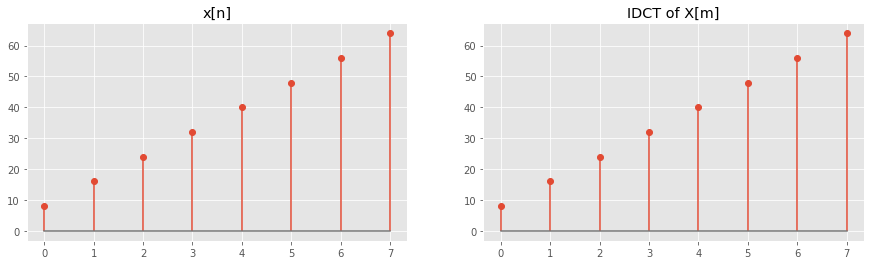

In [141]:
#Plotting the x[n] and the inverse dct of X(m)::


fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.stem(x_n,use_line_collection=True)
plt.title("x[n]")
plt.subplot(1,2,2)
plt.stem(x_n_inverse,use_line_collection=True)
plt.title("IDCT of X[m]")

In [148]:
"""
compute the mean square error between the two signals.

"""
# Defining the function for mean square error:

def MSE(m,n):
    N=len(m)
    x=[(m[i]-n[i])**2 for i in range(N)]
    y=sum(np.abs(x))
    return y/N   

# Calling the function for finding the mean square between x[n] and inverse IDCT sequence:

x_n =[8,16,24,32,40,48,56,64] 
mean_square_error = MSE(x_n,x_n_inverse)

print("The mean square error is between x[n] and inverse IDCT sequence is::\n",mean_square_error)
print("we can see the mean square error is almost ZERO")

The mean square error is between x[n] and inverse IDCT sequence is::
 3.8575298265307477e-28
we can see the mean square error is almost ZERO
